In [53]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [54]:
amazon_monthly_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amazon_monthly.csv'
sp500_monthly_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P500_monthly.csv'
amazon_daily_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv'
sp500_daily_csv_path = '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv'

## Finding correlation using monthly data

In [55]:
# Reading monthly data from CSV files
amazon_monthly = pd.read_csv(amazon_monthly_csv_path, parse_dates=['date'])
sp500_monthly = pd.read_csv(sp500_monthly_csv_path, parse_dates=['datadate'])

In [56]:
amazon_monthly = amazon_monthly.dropna()
sp500_monthly = sp500_monthly.dropna()

In [57]:
amazon_monthly.head(10)

,PERMNO,date,COMNAM,PRC
0,84788,2018-01-31,AMAZON COM INC,1450.89001
1,84788,2018-02-28,AMAZON COM INC,1512.44995
2,84788,2018-03-29,AMAZON COM INC,1447.33997
3,84788,2018-04-30,AMAZON COM INC,1566.13000
4,84788,2018-05-31,AMAZON COM INC,1629.62000
5,84788,2018-06-29,AMAZON COM INC,1699.80005
6,84788,2018-07-31,AMAZON COM INC,1777.43994
7,84788,2018-08-31,AMAZON COM INC,2012.70996
8,84788,2018-09-28,AMAZON COM INC,2003.00000
9,84788,2018-10-31,AMAZON COM INC,1598.01001


In [58]:
amazon_monthly.isnull().any()
sp500_monthly.isnull().any()

gvkeyx      False
prccm       False
datadate    False
conm        False
tic         False
dtype: bool

## Pearson Correlation

In [59]:
# Correlation for monthly data
monthly_correlation = pearsonr(amazon_monthly['PRC'], sp500_monthly['prccm'])[0]
print(f"Monthly Correlation: {monthly_correlation:.4f}")

Monthly Correlation: 0.3881


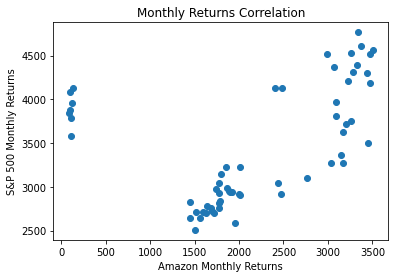

In [60]:
# Plot monthly returns
plt.scatter(amazon_monthly['PRC'], sp500_monthly['prccm'])
plt.title('Monthly Returns Correlation')
plt.xlabel('Amazon Monthly Returns')
plt.ylabel('S&P 500 Monthly Returns')
plt.show()

## Linear Regression

Mean Squared Error for Linear Regression: 1180814.5954063812


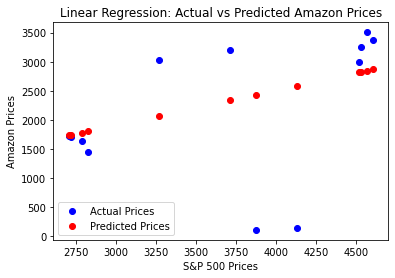

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#read monthly data
X = sp500_monthly[['prccm']].values  # S&P 500 prices as independent variable
y = amazon_monthly['PRC'].values    # Amazon prices as dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Amazon prices on the test set
y_pred_lr = model.predict(X_test)

# Calculate the mean squared error on the test set
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error for Linear Regression:", mse_lr)

#Plot actual vs. predicted prices for visual inspection
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred_lr, color='red', label='Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Amazon Prices')
plt.xlabel('S&P 500 Prices')
plt.ylabel('Amazon Prices')
plt.legend()
plt.show()

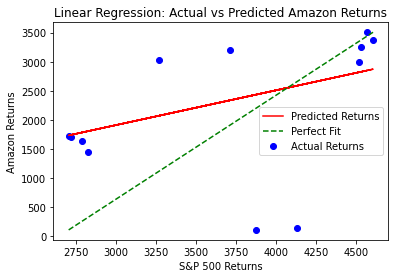

In [132]:
# Here, additionally plot a line of perfect predictions for reference
# It will help to visually assess the accuracy of the model
plt.scatter(X_test, y_test, color='blue', label='Actual Returns')  # Actual data points
plt.plot(X_test, y_pred_lr, color='red', label='Predicted Returns')  # Regression line
plt.plot([min(X_test), max(X_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Perfect Fit')
plt.xlabel('S&P 500 Returns')
plt.ylabel('Amazon Returns')
plt.title('Linear Regression: Actual vs Predicted Amazon Returns')
plt.legend()
plt.show()

## Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

In [70]:
# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 471566.74278984143


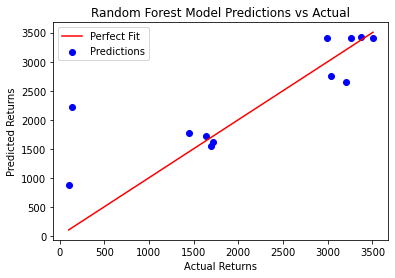

In [71]:
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.title('Random Forest Model Predictions vs Actual')
plt.legend()
plt.show()

# Linear Regression for Daily Data

In [127]:
#Reading Daily Data
amazon_df = pd.read_csv(
    '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv',
    parse_dates=['Date'],
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y'),
    index_col='Date'
)
sp500_df = pd.read_csv(
    '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv',
    parse_dates=['Date'],
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y'),
    index_col='Date'
)

/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/2492815898.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  amazon_df = pd.read_csv(
/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/2492815898.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sp500_df = pd.read_csv(


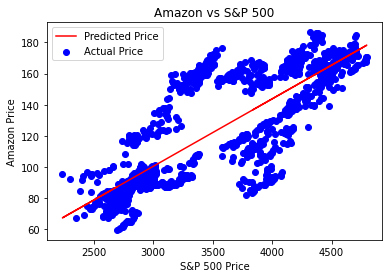

In [130]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = sp500_df[' Close'].values.reshape(-1, 1)  # S&P 500 Close prices as independent variable
y = amazon_df[' Close'].values  # Amazon Close prices as dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict Amazon prices based on S&P 500
amazon_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual Price')
plt.plot(X, amazon_pred, color='red', label='Predicted Price')
plt.title('Amazon vs S&P 500')
plt.xlabel('S&P 500 Price')
plt.ylabel('Amazon Price')
plt.legend()
plt.show()



In [131]:
# Mean Sqaured Error for daily data
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, amazon_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 424.0180883681631


## Rolling Correlation for daily data

/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/845728175.py:22: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  amazon_daily = pd.read_csv(
/var/folders/13/vzz1wpdx7v71md6284hwnky40000gn/T/ipykernel_24461/845728175.py:28: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sp500_daily = pd.read_csv(


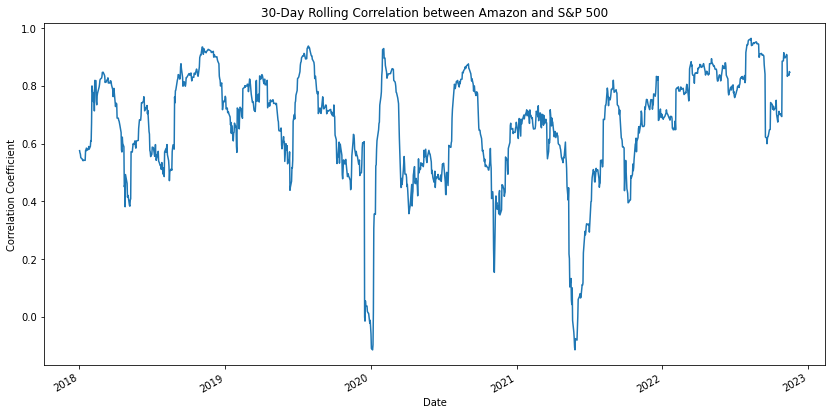

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

amazon_daily = pd.read_csv(
    '/Users/surya/Desktop/FE-511/FE511/Final PRoject/amzn_daily_wallstreet_HistoricalPrices.csv',
    parse_dates=['Date'],
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y'),
    index_col='Date'
)
sp500_daily = pd.read_csv(
    '/Users/surya/Desktop/FE-511/FE511/Final PRoject/S&P_daily_wallstreet_HistoricalPrices.csv',
    parse_dates=['Date'],
    date_parser=lambda x: pd.to_datetime(x, format='%m/%d/%y'),
    index_col='Date'
)

# Calculate daily returns
amazon_daily['Returns'] = amazon_daily[' Close'].pct_change()
sp500_daily['Returns'] = sp500_daily[' Close'].pct_change()

# Drop the first row since it will be NaN after pct_change()
amazon_daily = amazon_daily.dropna()
sp500_daily = sp500_daily.dropna()

# Align the dataframes to ensure they have the same dates
combined_returns = pd.concat([amazon_daily['Returns'], sp500_daily['Returns']], axis=1, join='inner')
combined_returns.columns = ['Amazon', 'S&P500']

# Calculate the rolling correlation
window_size = 30  # or another window size you think is appropriate
rolling_correlation = combined_returns['Amazon'].rolling(window=window_size).corr(combined_returns['S&P500'])

# Plot the rolling correlation
plt.figure(figsize=(14, 7))
rolling_correlation.plot(title=f'{window_size}-Day Rolling Correlation between Amazon and S&P 500')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.show()